In [7]:
import matplotlib.pyplot as plt
import networkx as nx
import nltk
from nltk.corpus import wordnet as wn
import spacy
import textacy
import owlready2
from rdflib import Graph, Namespace, RDF, RDFS

- **Ejercicio 1:**

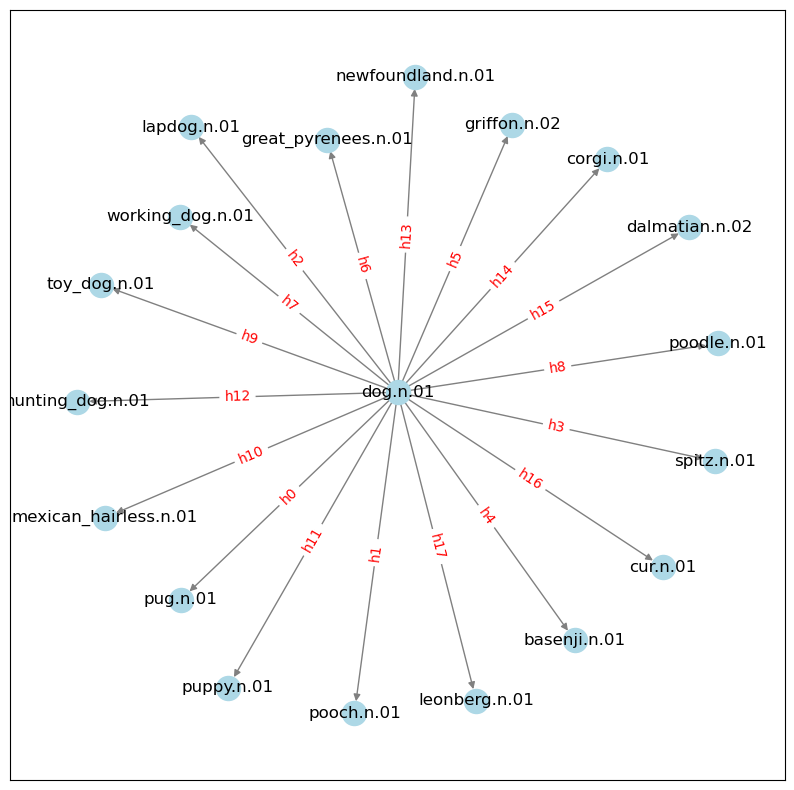

In [8]:
# Obtenemos el synset dog.n.01
dog_synset = wn.synset("dog.n.01")

# Obtenemos los hipónimos del synset
dog_hyponyms = dog_synset.hyponyms()

# Creamos el grafo de hipónimos
G = nx.DiGraph()
for h_idx, h in enumerate(dog_hyponyms):
    G.add_edge(dog_synset.name(), h.name(), label=f"h{h_idx}")

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.5)
nx.draw_networkx(G, pos, node_color="lightblue", edge_color="gray")
edge_labels = nx.get_edge_attributes(G, "label")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red", font_size=10)
plt.show()

- **Ejercicio 2:**

In [9]:
# Obtenemos los paths de hiperónimos que llevan hasta el synset "dog.n.01"
hypernym_paths = dog_synset.hypernym_paths()

graphs = []
# Para cada path...
for p in hypernym_paths:
    G = nx.DiGraph()
    # Para cada synset hiperónimo desde el synset hiperónimo raíz...
    for h_idx in range(len(p)-1):
        G.add_edge(p[h_idx].name(), p[h_idx+1].name())
    graphs.append(G)

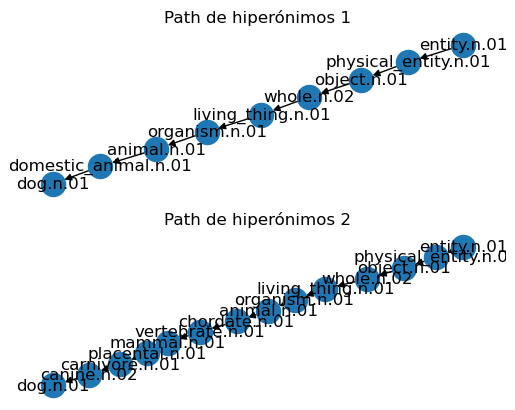

In [10]:
fig, axs = plt.subplots(len(hypernym_paths), 1)
for axs_id in range(len(axs)):
    axs[axs_id].axis("off")
    axs[axs_id].set_title(f"Path de hiperónimos {axs_id+1}")
    g = graphs[axs_id]
    pos = nx.kamada_kawai_layout(g)
    nx.draw_networkx(g, pos, ax=axs[axs_id])
plt.show()

- **Ejercicio 3:**

In [11]:
sents = """Jack eats pizza.
Jack reads a book.
Alice sells pizza.
Bob writes a book."""

# Cargamos el modelo de SpaCy
nlp = spacy.load("en_core_web_sm")
doc = nlp(sents)
triples = list(textacy.extract.subject_verb_object_triples(doc))

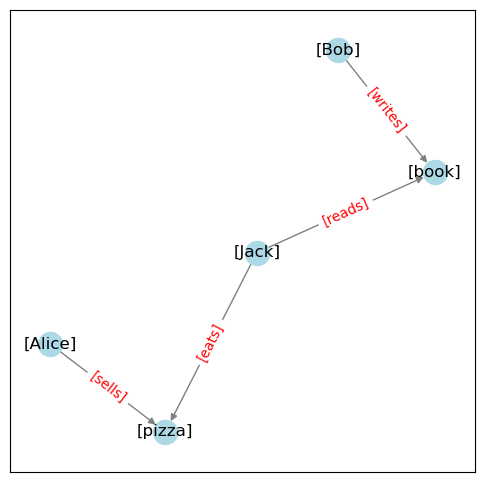

In [12]:
# Creamos el grafo de NetworkX
G = nx.DiGraph()
for triple_idx, triple in enumerate(triples):
    G.add_edge(str(triple.subject), str(triple.object), label=str(triple.verb))

plt.figure(figsize=(6, 6))
pos = nx.spring_layout(G, k=0.5)
nx.draw_networkx(G, pos, node_color="lightblue", edge_color="gray")
edge_labels = nx.get_edge_attributes(G, "label")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red", font_size=10)
plt.show()

- **Ejercicio 4:**

In [13]:
onto = owlready2.get_ontology("http://www.lesfleursdunormal.fr/static/_downloads/pizza_onto.owl").load()

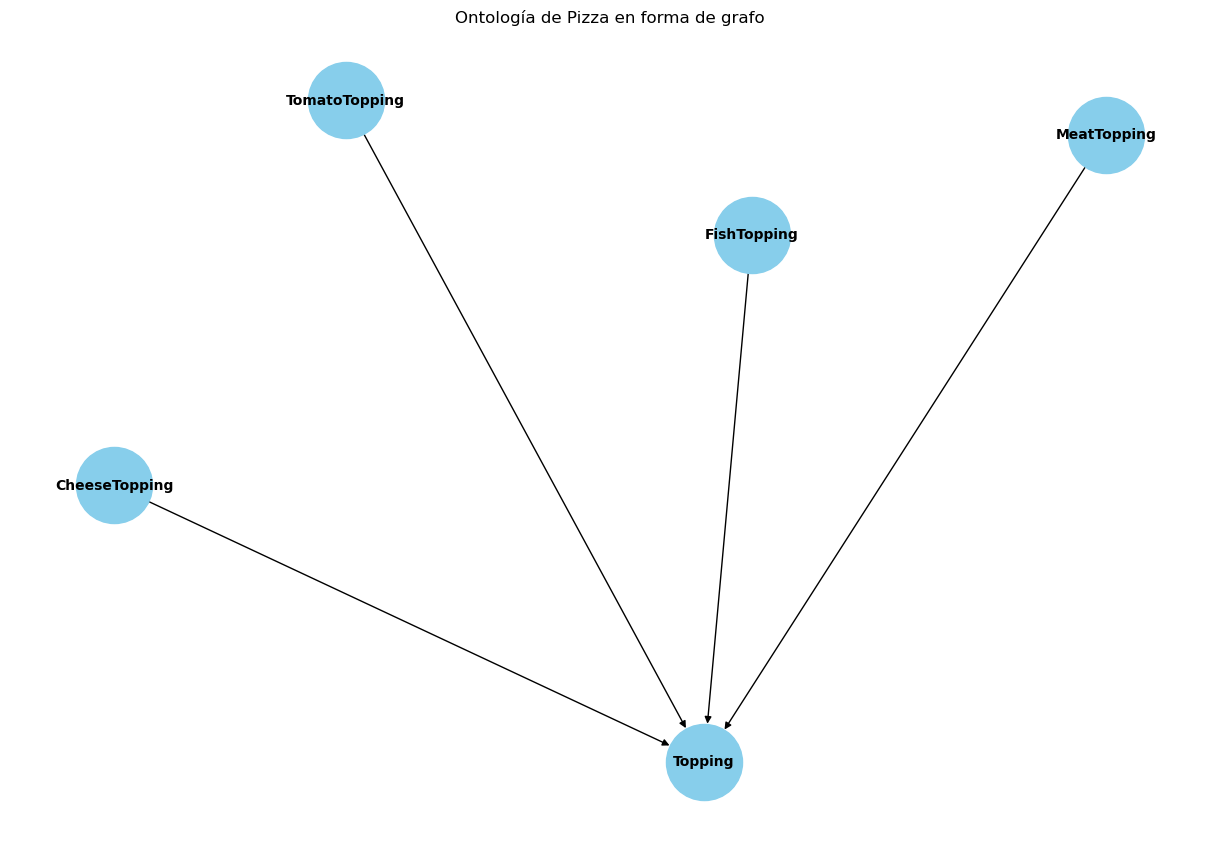

In [14]:
# Mostrar grafo de la ontología
g = onto.world.as_rdflib_graph()

# Crear un grafo de NetworkX
G = nx.DiGraph()

# Añadir nodos y aristas al grafo
for s, p, o in g:
    if p == RDFS.subClassOf:
        G.add_edge(s.split('#')[-1], o.split('#')[-1])

# Dibujar el grafo
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", arrows=True)
plt.title("Ontología de Pizza en forma de grafo")
plt.show()

In [15]:
# Mostrar clases de la ontología
print("Clases de la ontología:")
for c in list(onto.classes()):
    print(str(c).split(".")[-1])

Clases de la ontología:
CheeseTopping
FishTopping
MeatTopping
Pizza
TomatoTopping
Topping


In [16]:
# Mostrar individuos de la ontología (instancias de clases)
print("Individuos de la ontología:")
print(list(onto.individuals()))

Individuos de la ontología:
[]


In [17]:
# Entidades o conceptos que tengan "Pizza" al final de su IRI
onto.search(iri="*Pizza")

[pizza_onto.Pizza]

In [18]:
# Individuos que tengan alguna relación "has_topping" con otros individuos
onto.search(has_topping = "*")

[]